# Hello  its day 10 today we have bank data The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

# Thank you

In [1]:
##import libraries 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
##read_data
data=pd.read_csv("/content/data.csv")
## first five rows of data
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
##cheaking shape 
data.shape

(6819, 96)

In [4]:
## cheaking null value 
data.isnull().any().sum()

0

# Data vizualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


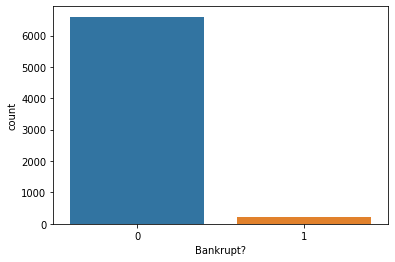

In [5]:
sns.countplot(data['Bankrupt?'])

 As you can see the dataset is highly unbalanced,This can be fixed with some under or oversampling. But I'm taking the Dataset as it is.

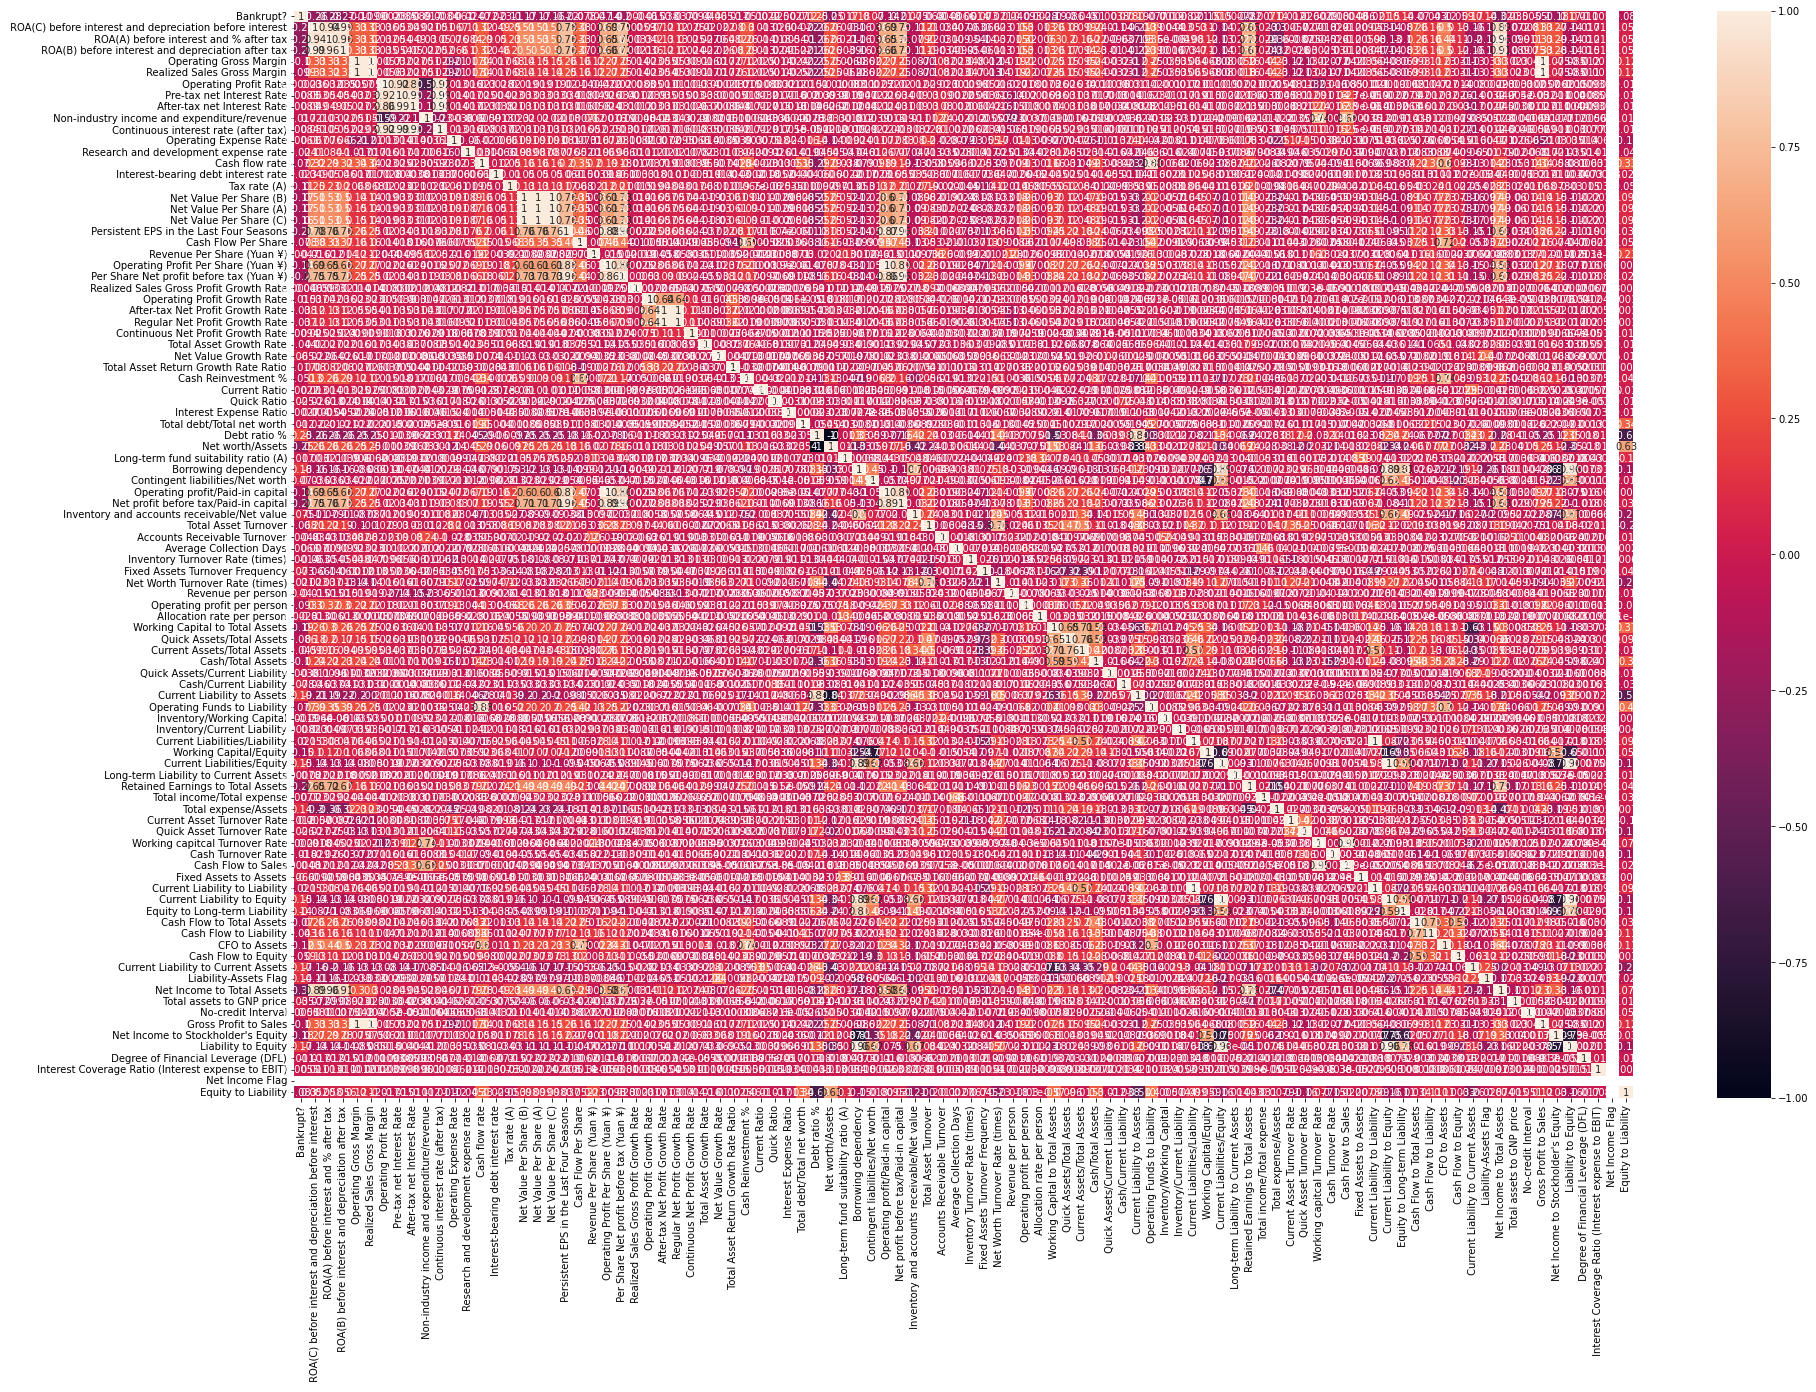

In [6]:
## cheaking corelation 
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

here we see that highest feature related to bankcorrupt
Based on fundamental understanding of businesses that go bankrupt are few assets, high debt, low profitability and low cash flow. Can look in this direction



In [7]:
##defineing  depend and independent variable 
x=data.drop(columns=['Bankrupt?'])
y=data['Bankrupt?']
## shape of depending and independent variable 
x.shape,y.shape

((6819, 95), (6819,))

## Now we build a model 

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4773, 95), (2046, 95), (4773,), (2046,))

##  support vector machine 

In [14]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm_fit=svm.fit(x_train,y_train)
svm_pred=svm_fit.predict(x_test)


In [15]:
svm_pred

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
y_test

239     0
2850    0
2687    0
6500    1
2684    0
       ..
4315    0
2228    0
1083    0
3355    0
861     0
Name: Bankrupt?, Length: 2046, dtype: int64

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,svm_pred)
cm

array([[1968,    0],
       [  78,    0]])

Text(0.5, 15.0, 'Predicted label')

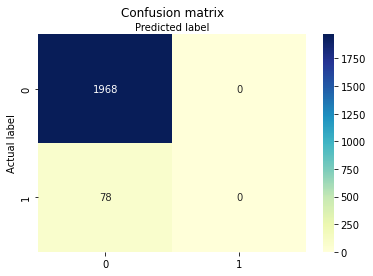

In [20]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
# CM1=pd.DataFrame(CM)
# print(CM1)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')